# Cardio Good Fitness Analysis

## Context:

The dataset provided contains details of the fitness of individuals after using treadmill, also contains details of the users. The aim is to analyse this dataset and provide meaningful insights which can help in improving the business.

## Data dictionary:
    
__Product__ - The model no of the treadmill <br>
__Age__ -  Age of the customer in number of years <br>
__Gender__ - Gender of the customer <br>
__Education__ - Education of the customer in number of years <br>
__Marital Status__ - Marital status of the customer <br>
__Usage__ - Avg number of times the customer wants to use the treadmill every week <br>
__Fitness__ - Self rated fitness score of the customer (5 - very fit, 1 - very unfit) <br>
__Income__ - Income of the customer <br>
__Miles__ - Miles that a customer expects to run <br>

### Import important libraries:

In [140]:
# Libraries to manipulate the data
import numpy as np
import pandas as pd

# Libraries to perform data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# The below command displays the graph
%matplotlib inline

### Import DataSet:

In [141]:
df = pd.read_csv("CardioGoodFitness.csv") # function to read the csv file

### Display the first five and last five rows:

In [142]:
df.head() # displays first 5 rows

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

In [143]:
df.tail() # displays last five rows

Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
175   TM798   40   Male         21        Single      6        5   83416   
176   TM798   42   Male         18        Single      5        4   89641   
177   TM798   45   Male         16        Single      5        5   90886   
178   TM798   47   Male         18     Partnered      4        5  104581   
179   TM798   48   Male         18     Partnered      4        5   95508   

     Miles  
175    200  
176    200  
177    160  
178    120  
179    180

### Check for number of rows and columns:

In [144]:
df.shape # shape attribute displays number of rows and columns of a pandas dataframe

(180, 9)

The dataset contains 180 rows and 9 columns

## Sanity Check:

### Check the datatypes of the columns:

In [145]:
df.info() # function that displays the number of rows, columns and datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Here, Product, Gender and MaritalStatus are of type object. <br>
Rest of the values are of type int. <br>
We can see that there are no missing values in this dataset. The below code snippet also verifies it. <br>

In [146]:
df.isnull().sum() # display number of null values in each column

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### Statistical Summary:

In [147]:
df.describe().T # display statistical summary of all numerical columns in a dataframe

count          mean           std      min       25%      50%  \
Age        180.0     28.788889      6.943498     18.0     24.00     26.0   
Education  180.0     15.572222      1.617055     12.0     14.00     16.0   
Usage      180.0      3.455556      1.084797      2.0      3.00      3.0   
Fitness    180.0      3.311111      0.958869      1.0      3.00      3.0   
Income     180.0  53719.577778  16506.684226  29562.0  44058.75  50596.5   
Miles      180.0    103.194444     51.863605     21.0     66.00     94.0   

                75%       max  
Age           33.00      50.0  
Education     16.00      21.0  
Usage          4.00       7.0  
Fitness        4.00       5.0  
Income     58668.00  104581.0  
Miles        114.75     360.0

__Age:__ The treadmill is being used by the users of age group between 18 to 50. The average age group is 26. 75% of the users are below the age of 34. <br>
The distribution on __education and income__ looks fine. <br>
__Usage:__ The customers use the treadmill at least twice a week, while some prefer to use it everyday. On an average, customers use it 3 times a week. <br>
__Fitness:__ The average fitness rating is 3, this might also depend on the number of times it is being used. <br>
__Miles:__ On an average, customers run for 94 miles. There is a major gap between 75% and max which shows this might contain outliers. <br>


### Details of the product:

In [148]:
df['Product'].nunique() # display number of unique products

3

In [149]:
df['Product'].unique() # display the list of unique products

array(['TM195', 'TM498', 'TM798'], dtype=object)

There are three types of treadmill in the given dataset - TM195, TM498 and TM798

### Check for duplicates:

In [150]:
df.duplicated().sum() # check if there are any duplicate rows present in the dataset

0

There are no duplicate rows in the dataset.

## Univariate Analysis:

### Analysis on Age:

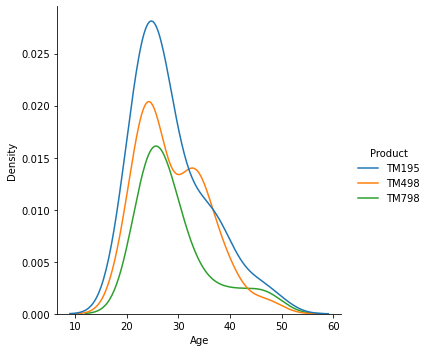

In [155]:
sns.displot(data=df, x='Age', hue='Product',kind='kde');

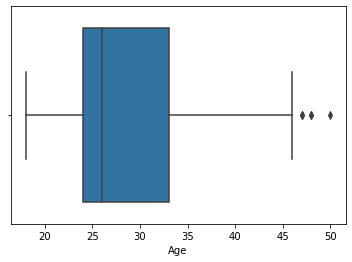

In [156]:
sns.boxplot(data=df, x='Age');

 - The distribution is right skewed. <br>
 - All the products are used by the customers of all age groups. <br>
 - There are few outliers above the age of 45. <br>
 - This is normal as there might be few users above the age of 45 using the product. <br>

### Analysis on Education:

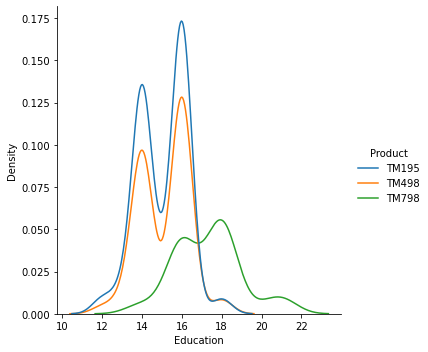

In [157]:
sns.displot(data=df, x='Education', hue='Product',kind='kde');

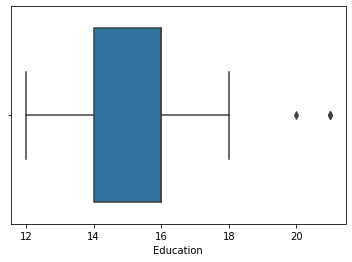

In [158]:
sns.boxplot(data=df, x='Education');

 - The distribution is right skewed. <br>
 - There are few outliers. <br>
 - TM798 is mostly used by customers who are highly educated compared to the other two products.<br>
 - Customers having more than 18 years of education seem to be high. Further analysis is required. <br>

In [159]:
# check for the number of years the individuals have obtained education
df['Education'].unique() 

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [160]:
# check the number of individuals who have taken more than 18 years to complete their education
df[df['Education']>18]['Education'].value_counts().sort_values(ascending=True)

20    1
21    3
Name: Education, dtype: int64

There are very few customers who have more than 18 years of education, which possibly can be Ph.D holders or the one's having more than 1 master degree which is normal.

### Analysis on Usage:

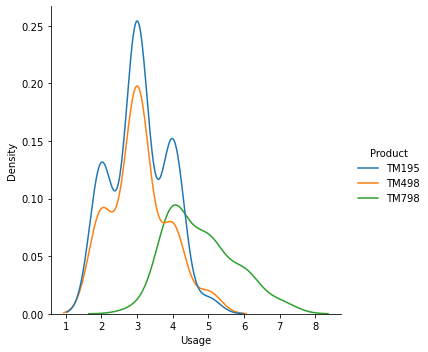

In [161]:
sns.displot(data=df, x='Usage', hue='Product',kind='kde');

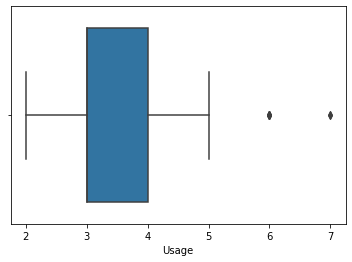

In [162]:
sns.boxplot(data=df, x='Usage');

 - The distribution is right skewed. <br>
 - There are outliers at 6 and 7 where very few customers use the product more than 5 times a week. <br>
 - Ideally customers exercise 3 to 5 times a week. <br>
 - TM798 has higher usage, which might indicate it has high performance. If the customer is using the product for 2-3 days in a week they mostly prefer TM195 or TM498. If it is more than 3 days, the customer goes for TM798. <br>

### Analysis on Fitness:

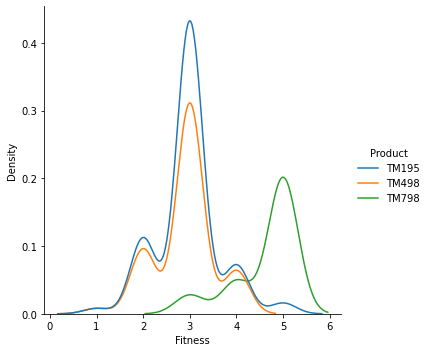

In [163]:
sns.displot(data=df, x='Fitness',hue='Product', kind='kde');

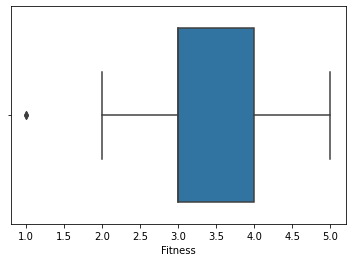

In [164]:
sns.boxplot(data=df, x='Fitness');

 - The distribution is left skewed. <br>
 - The value 1 is an outlier. <br>
 - The customers mostly consider themselves to be fit after using the product. <br>
 - Since TM798 has higher usage, the fitness rating is also higher. <br>

### Analysis on Income

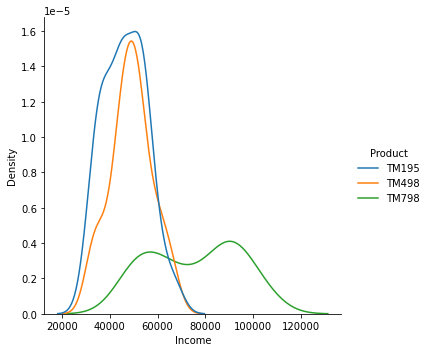

In [165]:
sns.displot(data=df, x='Income',hue='Product', kind='kde');

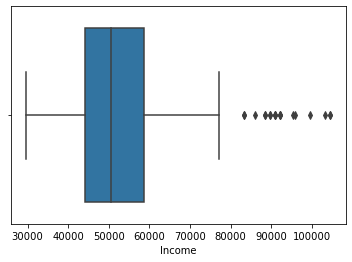

In [166]:
sns.boxplot(data=df, x='Income');

 - The distribution is right skewed <br>
 - There are many outliers above the income of 80000. <br>

### Analysis on Miles:

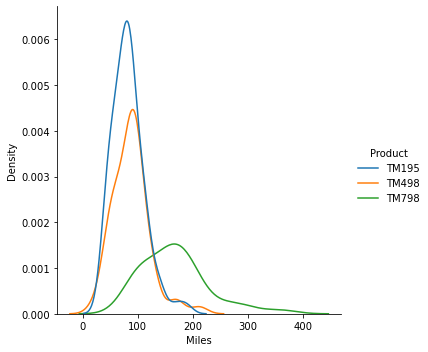

In [167]:
sns.displot(data=df, x='Miles',hue='Product', kind = 'kde');

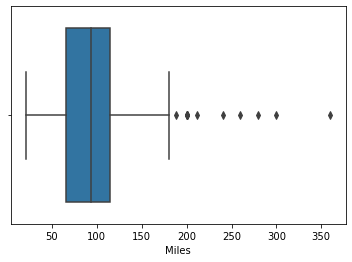

In [168]:
sns.boxplot(data=df, x='Miles');

 - The distribution is right skewed. <br>
 - TM798 has the highest distance covered. <br>
 - There are many outliers. <br>
 - There are customers who run for 350 miles which is huge. This has to be checked further. <br>

In [47]:
df[df['Miles']>300] # check for customers runs more than 300 miles using the product

Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
173   TM798   35   Male         16     Partnered      4        5   92131   

     Miles  
173    360

Looking at the data, we cannot make a conslusion whether the data is a typing error. 

### Analysis on categorical levels:

#### Analysis on Product:

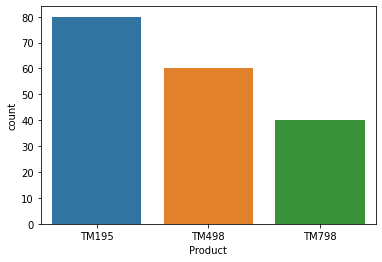

In [169]:
sns.countplot(data=df, x='Product');

The highest used product is TM195 and least used product is TM798.

#### Analysis on usage of product based on Gender:

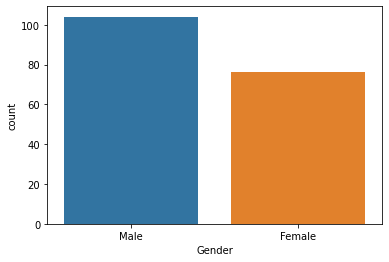

In [170]:
sns.countplot(data=df, x='Gender');

Major users are male. Now let us see which product is preferred by each gender type.

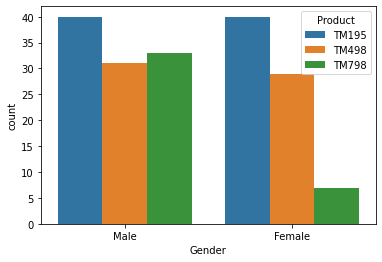

In [171]:
sns.countplot(data=df, x='Gender', hue='Product');

 - Male customers likely prefer TM195 and TM798. <br>
 - Female customers prefer TM195 and TM498. The least used product by female customers is TM798. Further analysis on this can be done to see why exactly this is not preferred by females. <br>

#### Analysis on Marital Status:

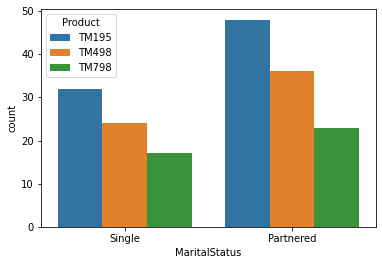

In [172]:
sns.countplot(data=df, x='MaritalStatus', hue='Product');

The products are mostly used by the customers who are married.

## Bivariate Analysis:

### Correlation of numerical properties:

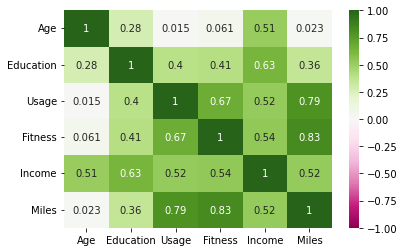

In [187]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="PiYG");

__From the above heatmap we can observe the following:__ <br>
 - Fitness and Miles have higher positive correlations. <br>
 - Usage, Fitness and Miles are strongly dependent on each other, all these factors are positively correlated. <br>
 - Education and Income have a greater influence on the usage. <br>

### Let us analyse the relationship between Usage, fitness and miles:

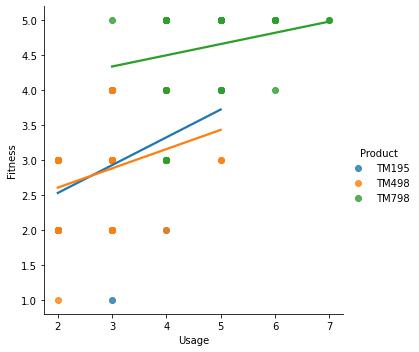

In [174]:
sns.lmplot(data=df,x='Usage',y='Fitness',hue='Product',ci=False);

   - Usage and Fitness are positively correlated for all the three products.

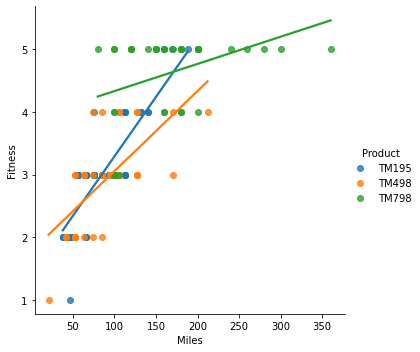

In [175]:
sns.lmplot(data=df,x='Miles',y='Fitness',hue='Product',ci=False);

 - Fitness and Miles are also positively correlated for all the products. <br>
 - One more pattern that we can notice here is, even though TM798 is not much popular among the customers, it has a higher performance and fitness rating compared to the other two products. <br>

### Let us see the relationship of age with usage:

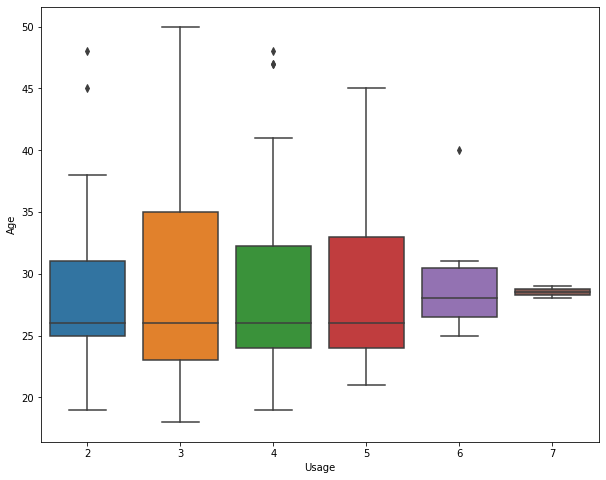

In [176]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Usage',y='Age');

 - The product is being used among the customers of age group 18 to 50. <br>
 - We can see that the median is between 25 to 30, which shows the major customers are of this age group. <br>
 - Most of the users prefer to use the product three times a week. <br>

### Let us check the overall relationship of all the numerical values in the data with each other:

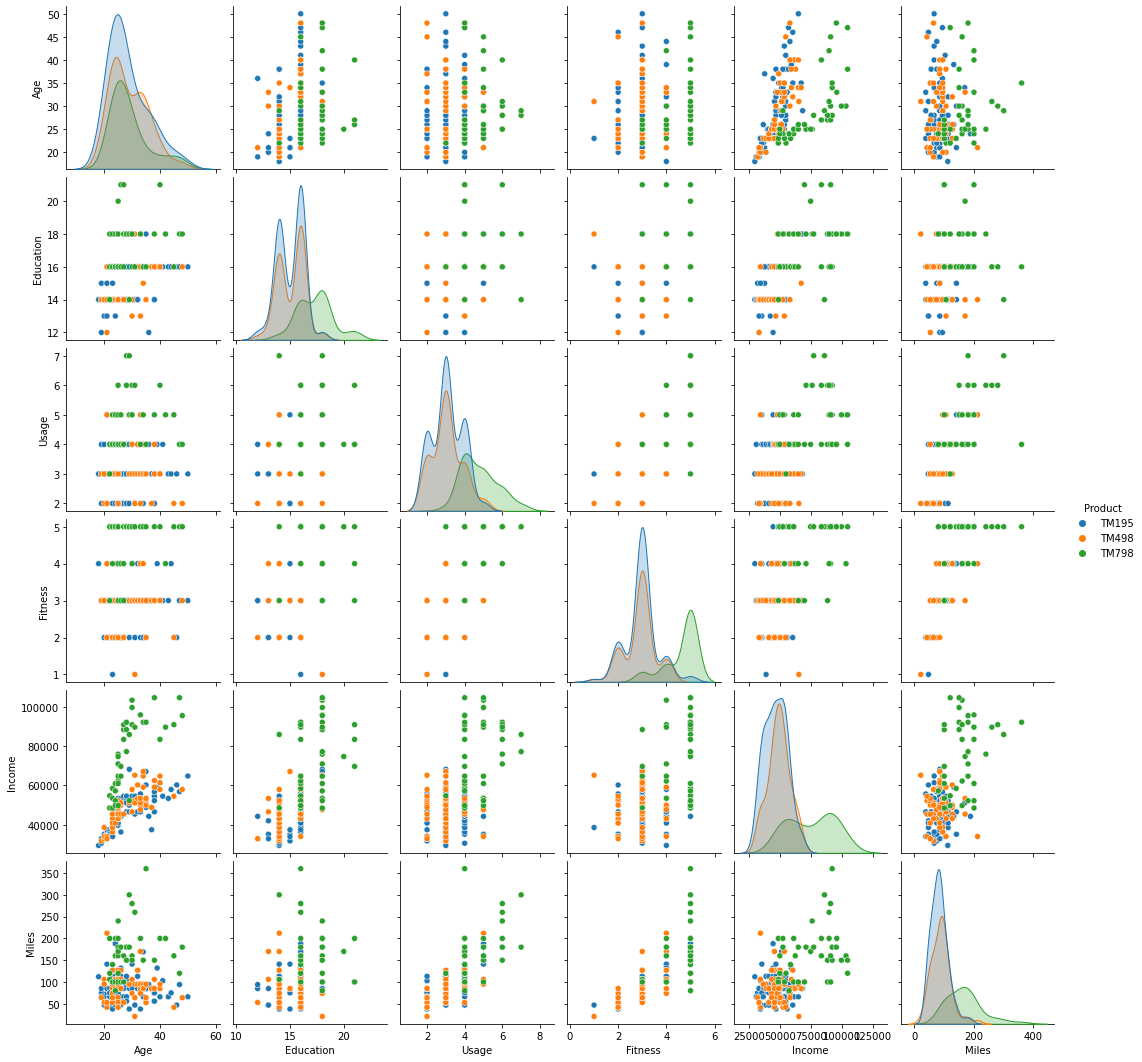

In [177]:
sns.pairplot(data=df,vars=['Age','Education','Usage','Fitness','Income','Miles'],hue='Product');

 - We can mostly see positive correlation among the different properties of this dataset. <br>
 - If we do a product wise comparison, we can say that TM195 and TM498 are the two products which are most likely preferred by the users. One reason could be that these two are budget friendly. <br>
 - TM798 has the highest fitness rating since it is used extensively. We can see that this product has higher performance compared to the other two. <br>

## Outlier Detection and Treatment:

### Analysis of outliers in different numerical properties of the dataset:

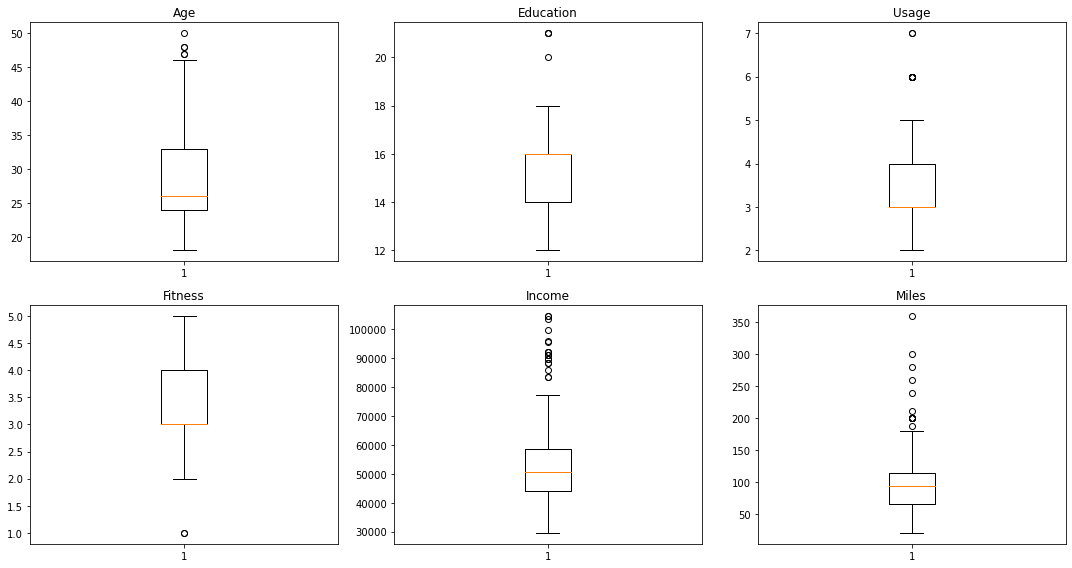

In [178]:
columns = ['Age','Education','Usage','Fitness','Income','Miles'] # list of numerical values in the dataset
plt.figure(figsize=(15,8)) # specify the size of each plot

for i, variable in enumerate(columns):
    plt.subplot(2,3, i + 1) # specify where to place each plot
    plt.boxplot(df[variable], whis=1.5) # create boxplot
    plt.tight_layout() # used to adjust the subplots
    plt.title(variable) # set the title to be the column name of that particular plot

plt.show()

__Age__ - The outliers in age can be normal. <br>
__Education__ - The outliers in years of education is too high, but we can consider it as people who have done multiple masters and Ph.D. <br>
__Usage__ - The outliers in usage can be considered normal as there are customers who workout everyday. <br>
__Fitness__ - As the rating can range anything between 0 to 5, the outlier here can be considered as genuine. <br>
__Income__ - Income can be varying based on the job, or number of jobs a person does. There can be millionaire as well. So the outliers here can be considered normal. <br>
__Miles__ - The value in the miles column seems to be unrealistic. We can treat the outliers here. <br>

#### Calculate the percentage of outliers in each column:

In [179]:
Q1 = df[columns].quantile(0.25) # first quantile -> 25% percentile
Q3 = df[columns].quantile(0.75) # second quantile -> 75% percentile

IQR = Q3 - Q1 # Inter quantile range                  

lower_whisker = Q1 - 1.5*IQR # finding the lower bound   
upper_whisker = Q3 + 1.5*IQR # finding the upper bound

# find the percentage of outliers in each column
((df[columns] < lower_whisker) | (df[columns] > upper_whisker)).sum()/df.shape[0]*100 

Age           2.777778
Education     2.222222
Usage         5.000000
Fitness       1.111111
Income       10.555556
Miles         7.222222
dtype: float64

### Let us treat the outliers in Miles column:

In [180]:
Q1 = df['Miles'].quantile(0.25)  # first quantile -> 25% percentile of column miles
Q3 = df['Miles'].quantile(0.75)  # second quantile -> 75% percentile of column miles
IQR = Q3 - Q1 # Inter quantile range       
lower_whisker = Q1 - 1.5 * IQR # finding the lower bound   
upper_whisker = Q3 + 1.5 * IQR  # finding the upper bound

# replacing the outliers with lower bound if it is less than lower bound or with upper bound if it is greater than upper bound
df['Miles'] = np.clip(df['Miles'], lower_whisker, upper_whisker) 

In [184]:
df['Miles']=df['Miles'].astype(int)
df['Miles']

0      112
1       75
2       66
3       85
4       47
      ... 
175    187
176    187
177    160
178    120
179    180
Name: Miles, Length: 180, dtype: int32

#### Let us now check the box plot for Miles column:

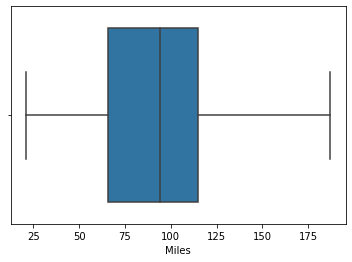

In [185]:
sns.boxplot(data=df, x='Miles');

In [186]:
df.to_csv('Cardio_Fitness_data_no_outliers.csv',index=False) # write the updated data to new file

## Insights:

Analysis was done on the data of a product that is a treadmill being used by a variety of customers. There are details of around 180 users here using three different products. 

The below observations were made:

 - The dataset contains details of three varieties of treadmills being used by the customers i.e, TM195, TM498, TM798. <br>
 - TM195 and TM498 are widely used by the customers. <br>
 - On an average, the product is used 3-4 times a week by the customers. <br>
 - The customers who use TM798, have a higher fitness rate, as it might be used by the people who exercise extensively. <br>
 - The product is being used by people of age 18 to 50 but the major customer group is between the ages of 25 to 35. <br>
 - Education and Income have an influence on which product customers prefer. <br>

## Recommendations:

 - Majority of customers are from the age group of 25 to 30. Focus should be more on this group. <br>
 - Awareness on the importance of fitness should be created through advertising. <br>
 - Show the customers how the product is beneficial irrespective of their age. <br>
 
 